In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv')

In [3]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df.columns = ['filmeid', 'titulo', 'genero']

In [7]:
df.head()

,filmeid,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
generos = df.genero.str.get_dummies()
df = pd.concat([df, generos], axis=1)

In [16]:
df.head()

,filmeid,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [19]:
from sklearn.cluster import KMeans

In [20]:
model = KMeans(n_clusters=3)
model.fit(generos)
print('Grupos {}'.format(model.labels_))

Grupos [2 0 2 ... 1 0 2]


In [21]:
print(model.cluster_centers_)

[[ 1.27436282e-02  3.54947526e-01  2.27511244e-01  1.04197901e-01
   8.65817091e-02  4.87256372e-03  1.17691154e-01  1.42803598e-01
   6.37181409e-03  1.25562219e-01  1.42428786e-02  2.44377811e-01
   3.74812594e-02  3.11094453e-02  8.69565217e-02  4.53523238e-02
   2.34257871e-01  3.54572714e-01  2.02398801e-02  2.69865067e-02]
 [ 9.36750677e-17  1.18460475e-01  6.84489514e-02  1.79764923e-02
   2.21249136e-02  2.32311593e-01  1.46577552e-01  5.07029269e-03
   1.00000000e+00  4.65545056e-02  1.12929246e-02  3.66443881e-02
   7.37497119e-03  2.65038027e-02  6.56833372e-02  2.14565568e-01
   4.37888914e-02  1.88061765e-01  6.86794192e-02  1.35976031e-02]
 [ 2.55871713e-17  1.34186472e-01  1.31261426e-01  9.32358318e-02
   1.23217550e-01  1.00000000e+00  9.10420475e-02  1.35283364e-02
   1.82815356e-03  8.84826325e-02 -7.63278329e-17  6.10603291e-02
   9.50639854e-03  4.97257770e-02  2.04753199e-02  1.98903108e-01
   6.03290676e-02  4.82632541e-02  1.09689214e-02  1.31627057e-02]]


In [22]:
clusters = pd.DataFrame(model.cluster_centers_, columns=generos.columns)

In [30]:
clusters = clusters.transpose()
clusters

,0,1,2
(no genres listed),0.012744,9.367507e-17,2.558717e-17
Action,0.354948,1.184605e-01,1.341865e-01
Adventure,0.227511,6.844895e-02,1.312614e-01
Animation,0.104198,1.797649e-02,9.323583e-02
Children,0.086582,2.212491e-02,1.232176e-01
Comedy,0.004873,2.323116e-01,1.000000e+00
Crime,0.117691,1.465776e-01,9.104205e-02
Documentary,0.142804,5.070293e-03,1.352834e-02
Drama,0.006372,1.000000e+00,1.828154e-03
Fantasy,0.125562,4.655451e-02,8.848263e-02


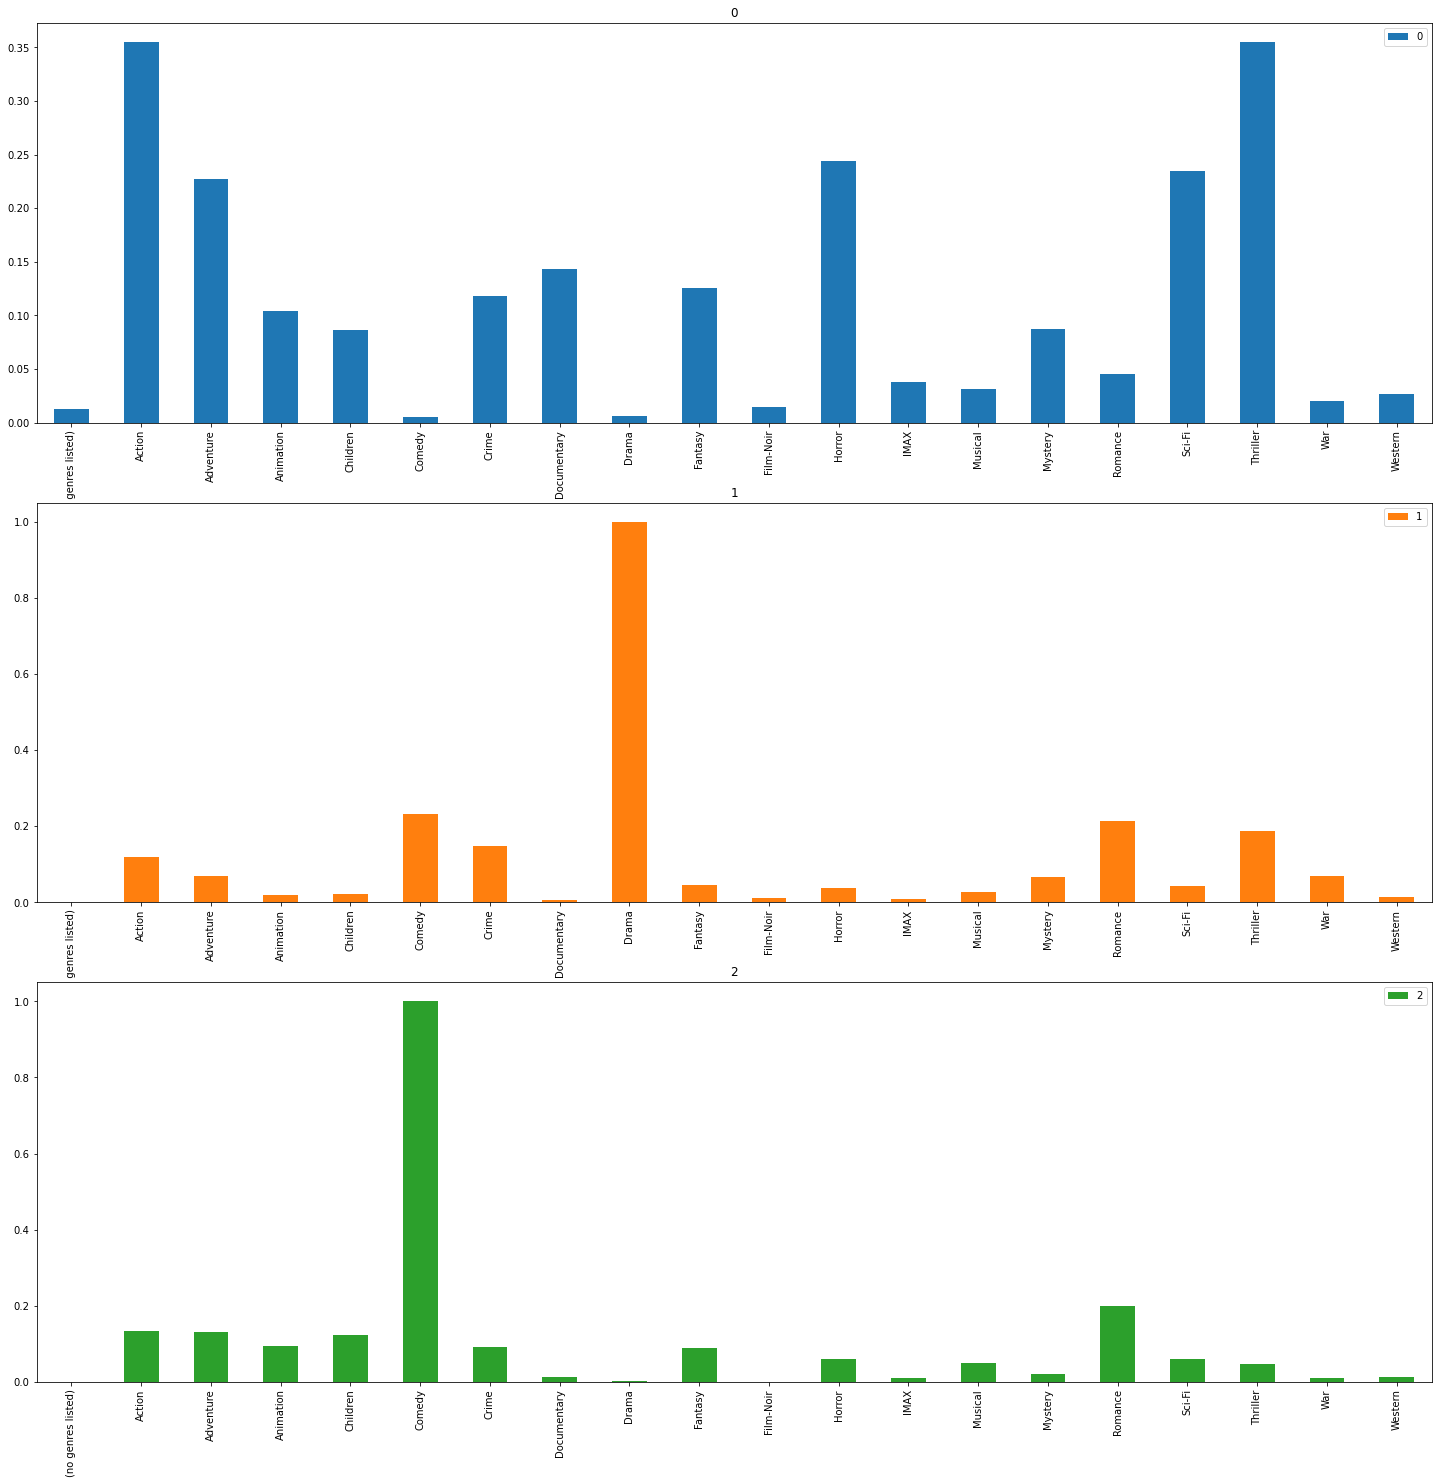

In [31]:
clusters.plot.bar(subplots=True, figsize=(25, 25), sharex=False);

In [34]:
cluster = 0
filtro = model.labels_ == cluster
df[filtro].sample(10)

,filmeid,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9312,159510,Death Smiles on a Murderer (1973),Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8143,102025,Yongary: Monster from the Deep (1967),Children|Horror|Sci-Fi,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4198,6059,"Recruit, The (2003)",Action|Thriller,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7913,95207,Abraham Lincoln: Vampire Hunter (2012),Action|Fantasy|Horror|Thriller,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1644,2193,Willow (1988),Action|Adventure|Fantasy,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8757,128360,The Hateful Eight (2015),Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8257,104908,Insidious: Chapter 2 (2013),Horror|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4367,6386,Nevada Smith (1966),Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7557,85394,Cave of Forgotten Dreams (2010),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
892,1189,"Thin Blue Line, The (1988)",Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.manifold import TSNE

In [36]:
tsne = TSNE()
viz = tsne.fit_transform(generos_escalados)
viz

array([[-56.66539 ,  32.611576],
       [-33.09483 ,  59.3923  ],
       [-12.869022,  -9.079019],
       ...,
       [  8.045475,  12.317059],
       [-61.553337, -25.068623],
       [ 17.462545, -24.680824]], dtype=float32)

In [37]:
import seaborn as sns

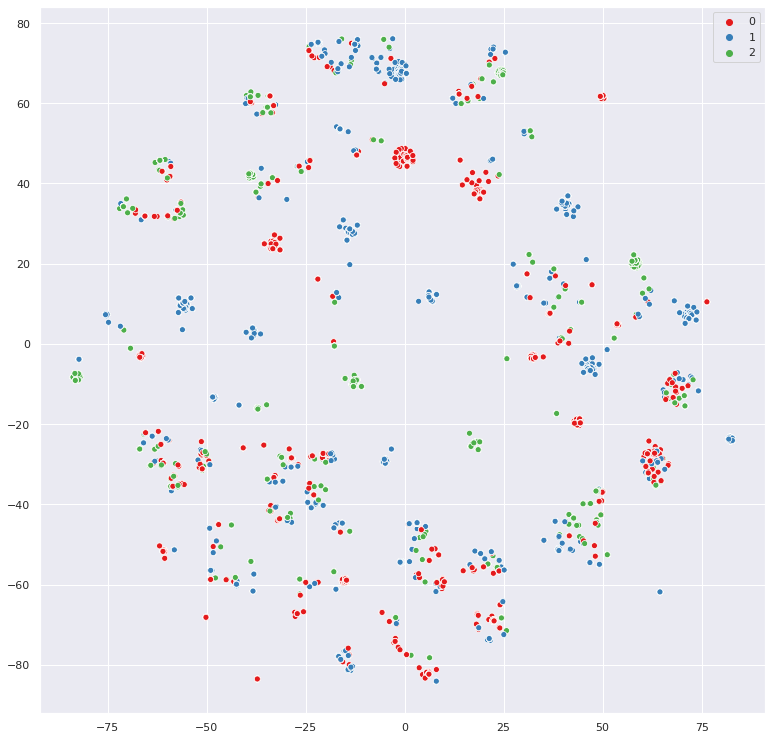

In [44]:
sns.set(rc={'figure.figsize':(13, 13)})
sns.scatterplot(x=viz[:, 0], y=viz[:, 1], hue=model.labels_, palette=sns.color_palette('Set1', 3));